In [1]:
!pip install tensorflow


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

In [4]:
#load the dataset
forest=pd.read_csv("forestfires.csv")
forest


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
#Find the Duplicated rows
forest[forest.duplicated()].shape


(8, 31)

In [6]:
forest[forest.duplicated()]


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
#dropthe Duplicated rows
forest1=forest.drop_duplicates()


In [8]:
forest1


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
forest1[forest1.duplicated()].shape


(0, 31)

In [10]:
forest1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [11]:
#month & Days Columns are not given more informatio,so it ignore
forest2=forest1.iloc[:,2:]
forest2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [12]:
#convert Categorical column to numerical using labelencoder function
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
forest2['size_category']=labelencoder.fit_transform(forest2['size_category'])
forest2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
#DataSheet Split into two part,X and y
array=forest2.values
X=array[:,0:28]
y=array[:,28]


In [14]:
#Define the Keras model
model=Sequential()
model.add(Dense(12,input_dim=28,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [15]:
#complie the keras model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
#fit the keras model in dataset
history=model.fit(X,y,epochs=150,validation_split=0.33,batch_size=10 )

Epoch 1/150
35/35 [==============================] - 2s 24ms/step - loss: 3.2478 - accuracy: 0.6833 - val_loss: 3.3921 - val_accuracy: 0.5179
Epoch 2/150
35/35 [==============================] - 0s 5ms/step - loss: 1.9383 - accuracy: 0.7185 - val_loss: 3.8408 - val_accuracy: 0.5060
Epoch 3/150
35/35 [==============================] - 0s 5ms/step - loss: 1.6392 - accuracy: 0.7067 - val_loss: 2.5556 - val_accuracy: 0.5833
Epoch 4/150
35/35 [==============================] - 0s 6ms/step - loss: 1.4581 - accuracy: 0.7537 - val_loss: 2.5236 - val_accuracy: 0.5655
Epoch 5/150
35/35 [==============================] - 0s 6ms/step - loss: 1.2006 - accuracy: 0.7683 - val_loss: 3.1056 - val_accuracy: 0.5357
Epoch 6/150
35/35 [==============================] - 0s 6ms/step - loss: 1.1141 - accuracy: 0.7654 - val_loss: 3.0029 - val_accuracy: 0.5595
Epoch 7/150
35/35 [==============================] - 0s 5ms/step - loss: 1.0128 - accuracy: 0.7595 - val_loss: 1.6951 - val_accuracy: 0.6369
Epoch 8/150


Epoch 59/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0476 - accuracy: 0.9883 - val_loss: 0.1601 - val_accuracy: 0.9464
Epoch 60/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0448 - accuracy: 0.9912 - val_loss: 0.1701 - val_accuracy: 0.9286
Epoch 61/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0384 - accuracy: 0.9941 - val_loss: 0.1673 - val_accuracy: 0.9345
Epoch 62/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0506 - accuracy: 0.9853 - val_loss: 0.1833 - val_accuracy: 0.9167
Epoch 63/150
35/35 [==============================] - 0s 5ms/step - loss: 0.1085 - accuracy: 0.9589 - val_loss: 0.1591 - val_accuracy: 0.9405
Epoch 64/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0468 - accuracy: 0.9883 - val_loss: 0.1758 - val_accuracy: 0.9286
Epoch 65/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.9971 - val_loss: 0.1485 - val_accuracy: 0.9464
Epoch 

35/35 [==============================] - 0s 4ms/step - loss: 0.1042 - accuracy: 0.9619 - val_loss: 0.2368 - val_accuracy: 0.9107
Epoch 117/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0829 - accuracy: 0.9589 - val_loss: 0.1485 - val_accuracy: 0.9524
Epoch 118/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0810 - accuracy: 0.9648 - val_loss: 0.3995 - val_accuracy: 0.8869
Epoch 119/150
35/35 [==============================] - 0s 4ms/step - loss: 0.1006 - accuracy: 0.9677 - val_loss: 0.1825 - val_accuracy: 0.9167
Epoch 120/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.1349 - val_accuracy: 0.9464
Epoch 121/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.2577 - val_accuracy: 0.9107
Epoch 122/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0227 - accuracy: 0.9941 - val_loss: 0.1518 - val_accuracy: 0.9345
Epoch 123/150

In [17]:
#evaluating the model
Scores=model.evaluate(X,y)
print("%s:%.2f%%"%(model.metrics_names[1],Scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9764
accuracy:97.64%


In [18]:
#list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


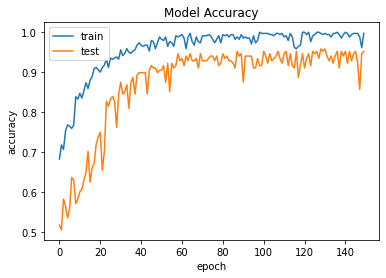

In [19]:
#Sumarize History for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

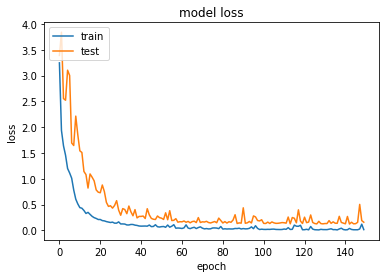

In [20]:
#Sumarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()